In [1]:
import numpy as np

import sklearn as sk
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from statsmodels.formula.api import logit
from sklearn.preprocessing import StandardScaler

#1. I used a few techniques to help me form a dataframe we can work with. First of all, I added the label column from credit_card_label to credit card. Secondly I duplicated the dataframe so I could make changes but keep the original just in case. I was able to give all the non numeric columns numeric values, while manually changing the columns I saw as ordinal using lambdas.

In [2]:
credit_df=pd.read_csv('Credit_card.csv')
label_df=pd.read_csv('Credit_card_label.csv')

In [3]:
credit_df['label']=label_df['label']

In [4]:
cor_df=credit_df.copy()

In [5]:
cor_df['GENDER']=cor_df['GENDER'].astype('category').cat.codes
cor_df['Car_Owner']=cor_df['Car_Owner'].astype('category').cat.codes
cor_df['Propert_Owner']=cor_df['Propert_Owner'].astype('category').cat.codes

In [6]:
credit_df['Type_Income'].value_counts()

Type_Income
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: count, dtype: int64

In [7]:
credit_df['EDUCATION'].value_counts()

EDUCATION
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: count, dtype: int64

In [8]:
credit_df['Housing_type'].value_counts()

Housing_type
House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: count, dtype: int64

In [9]:
credit_df['Marital_status'].value_counts()

Marital_status
Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: count, dtype: int64

In [10]:
cor_df['Marital_status']=cor_df['Marital_status'].map(lambda x: 1 if 'Single / not married' in x
                                                      else 2 if 'Separated' in x
                                                      else 3 if 'Widow' in x
                                                      else 4 if 'Civil marriage' in x
                                                      else 5 if 'Married' in x
                                                      else 5)

In [11]:
cor_df['Type_Income']=cor_df['Type_Income'].map(lambda x: 1 if 'Pensioner' in x
                                                else 2 if 'State servant' in x
                                                else 3 if 'Working' in x
                                                else 4 if 'Commercial associate' in x
                                                else 3)

In [12]:
cor_df['EDUCATION']=cor_df['EDUCATION'].map(lambda x: 1 if 'Lower secondary' in x
                                            else 2 if 'Secondary / secondary special' in x
                                            else 3 if 'Incomplete higher' in x
                                            else 4 if 'Higher education' in x
                                            else 5 if 'Academic degree' in x
                                            else 2 in x)

In [13]:
cor_df['Housing_type']=cor_df['Housing_type'].map(lambda x: 1 if 'With parents' in x
                                                  else 2 if 'Municipal apartment' in x
                                                  else 3 if 'Rented apartment' in x
                                                  else 4 if 'Co-op apartment' in x
                                                  else 5 if 'Office apartment' in x
                                                  else 6 if 'House / apartment' in x
                                                  else 6)

In [14]:
credit_df['Type_Occupation'].value_counts()

Type_Occupation
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: count, dtype: int64

In [15]:
cor_df['Type_Occupation']=cor_df['Type_Occupation'].astype(str)
cor_df['Type_Occupation']=cor_df['Type_Occupation'].map(lambda x: 1 if 'Low-skill Laborers' in x
                                                        else 2 if 'Waiters/barmen staff' in x
                                                        else 3 if 'Cleaning staff' in x
                                                        else 4 if 'Drivers' in x
                                                        else 5 if 'Cooking staff' in x
                                                        else 6 if 'Private service staff' in x
                                                        else 7 if 'Realty agents' in x
                                                        else 8 if 'Security staff' in x
                                                        else 9 if 'Laborers' in x
                                                        else 10 if 'Sales staff' in x
                                                        else 11 if 'Secretaries' in x
                                                        else 12 if 'IT staff' in x
                                                        else 13 if 'HR staff' in x
                                                        else 14 if 'Accountants' in x
                                                        else 15 if 'Medicine staff' in x
                                                        else 16 if 'High skill tech staff' in x
                                                        else 17 if 'Core staff' in x
                                                        else 18 if 'Managers' in x
                                                        else 9)

In [16]:
# this is just for curiousity reasons
credit_df['label'].value_counts()

label
0    1373
1     175
Name: count, dtype: int64

In [17]:
cor_df['Annual_income'].value_counts()

Annual_income
135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: count, Length: 115, dtype: int64

In [18]:
cor_df['Annual_income']=cor_df['Annual_income'].fillna(135000)

In [19]:
cor_df['Birthday_count'].mean()

-16040.342070773264

In [20]:
cor_df['Birthday_count']=cor_df['Birthday_count'].fillna(-16040.342070773264)

#2 

In [21]:
cor_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000.0,1,4,5,6,-18772.000000,365243,1,0,0,0,9,2,1
1,5009744,0,1,0,0,315000.0,4,4,5,6,-13557.000000,-586,1,1,1,0,9,2,1
2,5009746,0,1,0,0,315000.0,4,4,5,6,-16040.342071,-586,1,1,1,0,9,2,1
3,5009749,0,1,0,0,135000.0,4,4,5,6,-13557.000000,-586,1,1,1,0,9,2,1
4,5009752,0,1,0,0,315000.0,4,4,5,6,-13557.000000,-586,1,1,1,0,9,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,135000.0,4,4,5,6,-11957.000000,-2182,1,0,0,0,18,2,0
1544,5023655,0,0,0,0,225000.0,4,3,1,6,-10229.000000,-1209,1,0,0,0,14,1,0
1545,5115992,1,1,1,2,180000.0,3,4,5,6,-13174.000000,-2477,1,0,0,0,18,4,0
1546,5118219,1,1,0,0,270000.0,3,2,4,6,-15292.000000,-645,1,1,1,0,4,2,0


In [22]:
correlation=cor_df.corr()
correlation

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
Ind_ID,1.000000,0.030013,-0.046811,-0.050421,0.032535,0.032417,0.044823,-0.024263,-0.024028,-0.051478,0.022778,-0.055396,NaN,0.085794,0.008403,-0.037923,0.012264,0.016950,0.016796
GENDER,0.030013,1.000000,0.354389,-0.033297,0.063543,0.193266,0.157517,0.027562,0.070045,-0.062745,0.175819,-0.172880,NaN,0.043219,-0.041613,-0.026514,-0.135031,0.099347,0.027392
Car_Owner,-0.046811,0.354389,1.000000,0.002401,0.063467,0.208002,0.132977,0.131975,0.143854,0.039243,0.144107,-0.150658,NaN,0.029856,0.031096,0.038007,-0.001708,0.119851,-0.014734
Propert_Owner,-0.050421,-0.033297,0.002401,1.000000,-0.003352,0.041812,-0.063936,0.005260,-0.001702,0.212335,-0.124128,0.100686,NaN,-0.170760,-0.080780,0.064180,-0.017639,-0.004458,-0.017906
CHILDREN,0.032535,0.063543,0.063467,-0.003352,1.000000,0.079007,0.183473,0.064387,0.151925,0.017760,0.278041,-0.219095,NaN,0.035014,-0.004908,0.025776,0.063314,0.890248,-0.021646
Annual_income,0.032417,0.193266,0.208002,0.041812,0.079007,1.000000,0.186677,0.251542,-0.041577,0.013071,0.111273,-0.158815,NaN,-0.071380,-0.007691,0.122875,0.165565,0.052535,0.021306
Type_Income,0.044823,0.157517,0.132977,-0.063936,0.183473,0.186677,1.000000,0.148375,0.029399,-0.052861,0.528727,-0.827194,NaN,0.163321,-0.012160,0.092142,0.127558,0.194207,-0.015173
EDUCATION,-0.024263,0.027562,0.131975,0.005260,0.064387,0.251542,0.148375,1.000000,0.017805,-0.001208,0.178939,-0.132792,NaN,0.010058,0.024516,0.116202,0.271582,0.062819,0.014999
Marital_status,-0.024028,0.070045,0.143854,-0.001702,0.151925,-0.041577,0.029399,0.017805,1.000000,0.073374,-0.003115,-0.055106,NaN,0.085188,0.044097,0.030475,0.004654,0.547324,-0.051796
Housing_type,-0.051478,-0.062745,0.039243,0.212335,0.017760,0.013071,-0.052861,-0.001208,0.073374,1.000000,-0.188523,0.063355,NaN,-0.046101,0.033255,-0.016540,0.027272,0.038373,-0.043651


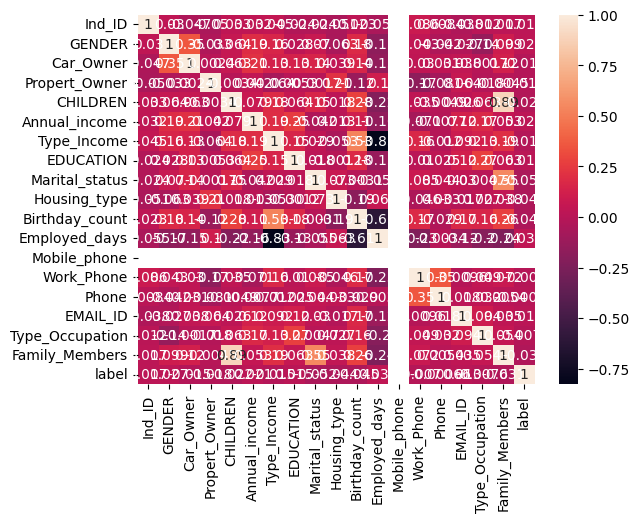

In [23]:
sns.heatmap(correlation, annot=True)
plt.show()

In [24]:
correlation_values = cor_df.corr()['label'].sort_values(ascending=False)
correlation_values

label              1.000000
Employed_days      0.031408
GENDER             0.027392
Annual_income      0.021306
Ind_ID             0.016796
EDUCATION          0.014999
EMAIL_ID           0.012921
Phone             -0.000664
Work_Phone        -0.007046
Type_Occupation   -0.007610
Car_Owner         -0.014734
Type_Income       -0.015173
Propert_Owner     -0.017906
CHILDREN          -0.021646
Family_Members    -0.030709
Housing_type      -0.043651
Birthday_count    -0.044831
Marital_status    -0.051796
Mobile_phone            NaN
Name: label, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(cor_df[['Marital_status']], cor_df['label'], test_size=0.3, random_state=32, stratify=cor_df['label'])

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
accuracy_score1 = model.score(X_test, y_test)
print('accuracy: ', accuracy_score1)

accuracy:  0.004922154840698134


With an accuracy of less than one percent, I think it pretty safe to say that univariate linear regression is probably not a very good approach for this dataset. In fact, it's awful. The dataset is too large and the outcome has many factors going into it. 

#3 

In [29]:
X = cor_df.drop('label', axis = 1)
X = X.drop('Mobile_phone', axis =1)
y = cor_df['label']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32, stratify=y)

In [31]:
k_values= [num for num in range(1, 60) if num % 2 != 0]

In [32]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = knn.score(X_test, y_test)

optimal_k = np.argmax(accuracy)
optimal_k

0

came up with this for loop to try to determine the optimal k but for some reason it just gives me 0. I had a slightly altered version before which gave only gave me 1(which is also incorrect). Im assuming a for loop testing different k values would be more efficient than doing so manually, but I am struggling with actually doing that. So I just tried a bunch of values manually and got the same score for any odd integer greater than 1

In [33]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(y_predict)
print(type(y_predict))
print(knn.score(X_test, y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>
0.886021505376344


We see that when we perform knn on this dataset we are correct over 88% percent of the time, which is far better than the <1% earlier.

#4

In [38]:
X = cor_df.drop('label', axis = 1)
X = X.drop('Mobile_phone', axis =1)
y = cor_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32, stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)

c:\users\brady\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
accuracy_score2 = model.score(X_test, y_test)
print('accuracy: ', accuracy_score2)

accuracy:  0.886021505376344


Somewhat surprisngly, logistic regression also gives a very low accuracy score. But what is extra surprising, is that we actually get a negative accuracy score, which I initially thought meant something might have been wrong, but I think it actually tells us something important about the data. What it tells us is that these columns seem very unrelated to getting approved for a credit card. If we look at my correlation chart from earlier, the highest correlaion was marital status, at just about 5%. When looking at the amount of people approved vs rejected in this dataset, we see a ratio of almost 8 people approved to every 1 rejected. This implies it is actually quite easy to get approved and therefore none of these "factors" are really that important. I think a dataset with a ratio closer to 1 to 1(even if not realistic) might help more accurately find correlation in the variables with the approval status, but we would still likely see pretty low correlation in most of these.
Typically, logistic regression is helpful when we are looking at outcomes that happen because of a number of variables we are given. Here, we don't seem to be given any real variables.

#5

In [123]:
#2
X_train, X_test, y_train, y_test = train_test_split(cor_df[['Marital_status']], cor_df['label'], test_size=0.3, random_state=32, stratify=cor_df['label'])
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score1 = model.score(X_test, y_test)
print('accuracy: ', accuracy_score1)

accuracy:  0.004805899343091835


In [124]:
#3 
X = cor_df.drop('label', axis = 1)
X = X.drop('Mobile_phone', axis =1)
y = cor_df['label']
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(y_predict)
print(type(y_predict))
print(knn.score(X_test, y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>
0.886021505376344


In [40]:
#4 
def train_and_evaluate(cor_df):
    X = cor_df.drop(['label', 'Mobile_phone'], axis=1)
    y = cor_df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32, stratify=y)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    accuracy_score2 = model.score(X_test, y_test)
    print('Accuracy:', accuracy_score2)
    return accuracy_score2

print('Accuracy:', accuracy_score2)

Accuracy: 0.886021505376344


Standardizing the data had virtually no impact on the tests run. It had zero impact on the knn test while changing less than a tenth of a percentage on the linear and logistic regression equations.
when looking at the accuracy scores from our 3 tests, it seems pretty obvious that the knn test was the way to go with this dataset due to how uncorrelated the data we are given is to the outcome we are studying